# CUSTOMER SEGMENTATION
Notebook ini berisi proses-proses dalam menentukan segmentasi pelanggan menggunakan algoritma KMeans Clustering.

## Import Library Yang Dibutuhkan

In [712]:
#Import Library
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import pickle

## Import Data
Import data yang akan digunakan ke dalam bentuk dataframe menggunakan library pandas. Namun sebelum itu kita perlu menentukan path atau lokasi dimana data kita dapat ditemukan.

In [713]:
#tentukan path
path = "Data/"
os.listdir(path)

['Clean_Data_Mall_Customers.csv', 'Data_Mall_Customers.csv']

Selanjutnya import data csv tersebut kedalam bentuk dataframe menggunakan pandas.

In [714]:
#import data
data = pd.read_csv(path+'Data_Mall_Customers.csv')

Kemudian kita coba lihat isi dari data tersebut dari 5 data teratas.

In [715]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Explore Data Analysis (EDA)
Selanjutnya kita coba eksplor dan analisa data yang kita miliki secara lebih mendalam untuk melihat pola data, infromasi data, anomali dan informasi statistik lainnya.

### Berapa jumlah baris dan kolom pada data?

In [716]:
data.shape

(200, 5)

Dari informasi yang kita dapat, data yang kita gunakan terdiri dari 200 baris dan 5 kolom.

### Apa saja kolom yang terdapat pada data?

In [717]:
for col in data.columns:
    print(col)

CustomerID
Gender
Age
Annual Income (k$)
Spending Score (1-100)


5 kolom yang ada pada data terdiri dari kolom CustomerID, Gender, Age, Annual Income dan Spending Score.

### Melihat informasi data

In [718]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Dari informasi data ini kita dapat melihat berapa jumlah data Null dan juga tipe data dari tiap kolom

### Cek apakah pada data terdapat missing value dan juga terdapat duplikat

In [719]:
# Cek missing value
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [720]:
# Cek duplikat 
data_duplikat =data[data.duplicated()]
data_duplikat

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


Berdasarkan informasi yang kita dapat, data yang kita gunakan tidak memiliki data yang duplikat dan juga missing value didalamnya.

## Pre-Processing Data
Pada proses ini kita akan melakukan proses cleaning dan juga manipulasi data. Tapi karena data yang kita gunakan sudah bersih (tidak terdapat missing value dan juga data duplikat) maka kita hanya akan melakukan manipulasi data. 

### Memperbaiki nama kolom
Diproses ini kita akan coba mengganti nama kolom menjadi bahasa indonesia dan juga sesuai dengan format agar lebih mudah dimengerti

In [721]:
#ubah nama kolom
data = data.rename(columns={'CustomerID' : 'id_pelanggan', 'Gender': 'jenis_kelamin', 'Age': 'usia',
                        'Annual Income (k$)': 'pendapatan_pertahun',
                        'Spending Score (1-100)': 'skor_pengeluaran'})

### Ganti data kategorik menjadi data numerik
Pada data yang kita gunakan, tepatnya di kolom jenis_kelamin. Data yang ada masih dalam bentuk kategorik yaitu male dan female. Kita perlu ubah ke dalam bentuk numerik karena algoritma KMeans yang nanti kita gunakan hanya menerima data numerik.
Disini kita akan ubah nilai female menjadi 0 dan male menjadi 1.

In [722]:
# ubah data kategorik mmenjadi data numerik
data['jenis_kelamin'].replace(['Female', 'Male'], [0,1], inplace=True)

### Ganti nilai pada kolom pendapatan pertahun
Di awal kita ketahui pada kolom pendapatn pertahun ialah sebuah nilai dalam format k($) atau ribu dollars. Disini kita akan ubah nilainya menjadi dalam rupiah.

In [723]:
#buat fungsi ribu dollars ke rupiah
def konversi(x):
    # pertama kita kalikan nilai dengan 1000 agar bentuknya menjadi satuan dollars 
    # kemudian kita kalikan dengan nilai rupiah terhadap dollars yang berlaku
    x = x * 1000 * 14322
    # selanjutnya kita ubah nilai satuan rupiah ke dalam puluh juta rupiah
    x = x / 10000000
    return int(x)

#terapkan konversi pada kolom pendapatan_pertahun
data['pendapatan_pertahun'] = data['pendapatan_pertahun'].apply(konversi)

Kemudian kita coba lihat lagi data dan juga informasi data yang telah selesai kita proses.

In [724]:
data.head()

,id_pelanggan,jenis_kelamin,usia,pendapatan_pertahun,skor_pengeluaran
0,1,1,19,21,39
1,2,1,21,21,81
2,3,0,20,22,6
3,4,0,23,22,77
4,5,0,31,24,40


In [725]:
data.tail()

,id_pelanggan,jenis_kelamin,usia,pendapatan_pertahun,skor_pengeluaran
195,196,0,35,171,79
196,197,0,45,180,28
197,198,1,32,180,74
198,199,1,32,196,18
199,200,1,30,196,83


In [726]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   id_pelanggan         200 non-null    int64
 1   jenis_kelamin        200 non-null    int64
 2   usia                 200 non-null    int64
 3   pendapatan_pertahun  200 non-null    int64
 4   skor_pengeluaran     200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


### Drop kolom yang kurang relevan untuk proses clustering
Selanjutnya kita perlu drop beberapa kolom yang kurang relevan untuk proses clustering seperti kolom id_costumer, jenis_kelamin dan juga usia. Karena kita tidak ingin melakukan segmentasi pelanggan berdasarkan hal tersebut. Semua jenis kelamin dan usia akan mendapatkan perlakuan yang sama. 

In [727]:
X = data.drop(['id_pelanggan', 'jenis_kelamin','usia'], axis=1)

In [728]:
X.head()

,pendapatan_pertahun,skor_pengeluaran
0,21,39
1,21,81
2,22,6
3,22,77
4,24,40


## Proses Clustering
Data yang telah selesai diproses selanjutnya akan di clustering menggunakan algoritma KMeans.

### Menentukan nilai optimal untuk parameter K 
Pada algoritma KMeans terdapat parameter K yang akan digunakan untuk proses clustering. Nilai optimal K dapat dicari dengan menggunakan metode Elbow yang didapatkan dari hasil perhitungan inersia untuk tiap nilai K yang digunakan.

In [729]:
#buat list untuk nilai inersia
inersia = []
for i in range(1,10):
  km = KMeans(n_clusters=i).fit(X)
  inersia.append(km.inertia_)

Text(0, 0.5, 'Inersia')

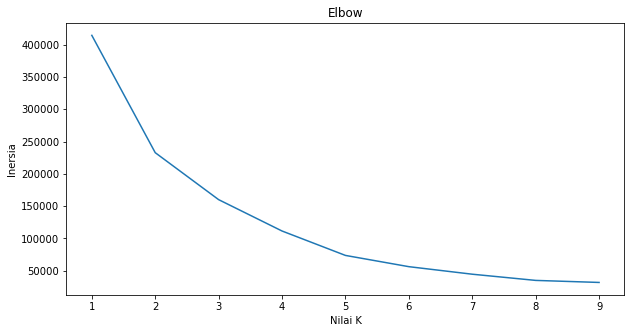

In [730]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=list(range(1, 10)), y=inersia, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Nilai K')
ax.set_ylabel('Inersia')

Untuk menentukan nilai K yang optimal dapat dilihat dari grafik elbow dengan menentukan titik nilai K dimana nilai Inersia turun secara linear. Dalam kasus ini Nilai K=5 adalah nilai yang optimal.

### Membuat model KMeans dengan nilai K = 5
Selanjutnya nilai K optimal yang telah didapat akan digunakan pada model untuk melakukan clustering data.

In [731]:
# buat  model KMeans
model = KMeans(n_clusters=5).fit(X)
model.predict(X)

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

### Tambahkan label hasil clustering pada data X yang akan diproses dan data asli

In [732]:
X['labels'] = model.labels_
data['labels'] = model.labels_

kemudian kita coba lihat data akhir yang sudah ditambahkan label clusteringnya.

In [733]:
X.head()

,pendapatan_pertahun,skor_pengeluaran,labels
0,21,39,3
1,21,81,0
2,22,6,3
3,22,77,0
4,24,40,3


In [734]:
X.tail()

,pendapatan_pertahun,skor_pengeluaran,labels
195,171,79,4
196,180,28,2
197,180,74,4
198,196,18,2
199,196,83,4


In [735]:
data.to_csv (r'Data/Clean_Data_Mall_Customers.csv', index = False, header=True)

### Plot hasil clustering

C:\Users\Alfian\anaconda3\envs\DataAlf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


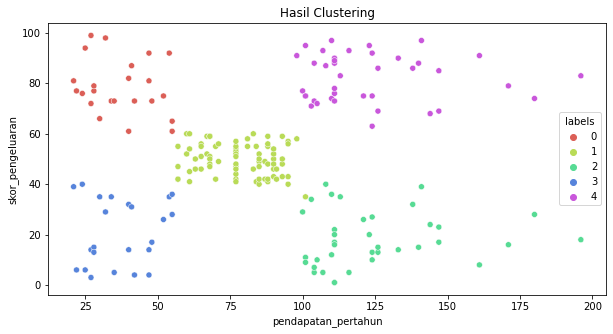

In [736]:
plt.figure(figsize=(10,5))
sns.scatterplot(X['pendapatan_pertahun'], X['skor_pengeluaran'], hue=X['labels'],
                palette=sns.color_palette('hls', 5))
plt.title('Hasil Clustering')
plt.show()

## SAVE MODEL

In [737]:
filename = 'clustering.sav'
pickle.dump(model, open(filename, 'wb'))

# ---------------------------------------------------------------------------------------------------------------
# CLUSTERING DATA BARU DAN UPDATE DATA
untuk proses update data, cukup run mulai dari baris dibawah ini(bisa juga dibuat dalam notebook baru)

In [743]:
data_update = pd.read_csv(path+'Clean_Data_Mall_Customers.csv')
id_input = data_update.shape[0] + 1
jk_input = input('Jenis Kelamin Pelanggan, 1 untuk pria, 0 untuk wanita: ')
usia_input = input('Usia Pelanggan: ')
x = input('Berapa pendapatan pertahun (dalam puluh juta):')
y = input('Berapa skor pengeluaran:')

data_input = [x,y]
data_input = np.array(data_input)
data_input = data_input.reshape(1,-1)

label_input = model.predict(data_input)
print('clustering: ' + str(label_input))

Jenis Kelamin Pelanggan, 1 untuk pria, 0 untuk wanita: 0
Usia Pelanggan: 29
Berapa pendapatan pertahun (dalam puluh juta):100
Berapa skor pengeluaran:80
clustering: [4]


In [744]:
newdata = pd.DataFrame(data_input, columns = ['pendapatan_pertahun','skor_pengeluaran'])
newdata['labels']=pd.DataFrame(label_input)
newdata.insert (0, 'id_pelanggan', id_input)
newdata.insert (1, 'jenis_kelamin', jk_input)
newdata.insert (2, 'usia', usia_input)
newdata.head()

,id_pelanggan,jenis_kelamin,usia,pendapatan_pertahun,skor_pengeluaran,labels
0,202,0,29,100,80,4


In [745]:
data_update = data_update.append(newdata, ignore_index=True)

In [746]:
data_update.tail()

,id_pelanggan,jenis_kelamin,usia,pendapatan_pertahun,skor_pengeluaran,labels
197,198,1,32,180,74,4
198,199,1,32,196,18,2
199,200,1,30,196,83,4
200,201,1,30,30,20,3
201,202,0,29,100,80,4


In [747]:
data_update.to_csv (r'Data/Clean_Data_Mall_Customers.csv', index = False, header=True)